In [6]:
import ctypes
from ctypes import POINTER, c_double, c_int, c_void_p, c_int64

# Load the DLL
mlp_lib = ctypes.CDLL("../library/MyMLP_DLL_TEST.dll")

# Define types for the functions
create_mlp = mlp_lib.create_mlp
create_mlp.argtypes = [POINTER(c_int64), c_int64]
create_mlp.restype = ctypes.c_void_p

destroy_mlp = mlp_lib.destroy_mlp
destroy_mlp.argtypes = [ctypes.c_void_p]
destroy_mlp.restype = None

train = mlp_lib.train
train.argtypes = [c_void_p, POINTER(c_double), c_int, c_int, POINTER(c_double), c_int, c_double, c_int, ctypes.c_bool]

predict = mlp_lib.predict
predict.argtypes = [c_void_p, POINTER(c_double), c_int, POINTER(c_double), ctypes.c_bool]

def convert_to_ctypes(X, Y):
    flat_X = (c_double * (len(X) * len(X[0])))(*sum(X, []))
    flat_Y = (c_double * len(Y))(*(y[0] for y in Y))
    return flat_X, flat_Y

In [7]:
import matplotlib.pyplot as plt

def plot_predictions_vs_actuals(X, Y, mlp_instance,is_classification):
    # Prédictions
    predictions = []
    for i in range(len(X)):
        test_input = (c_double * len(X[0]))(*X[i])
        output = (c_double * 1)()
        predict(mlp_instance, test_input, len(X[0]), output, is_classification)
        predictions.append(output[0])
        print("Predicted output for input", X[i], "is:", output[0])

    # Traçage des prédictions vs valeurs réelles
    actuals = [y[0] for y in Y]
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(X)), actuals, color='blue', label='Actual')
    plt.scatter(range(len(X)), predictions, color='red', label='Predicted')
    plt.xlabel('Sample index')
    plt.ylabel('Output')
    plt.title('Predictions vs Actuals')
    plt.legend()
    plt.show()

def plot_initial_values(X, Y):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(X)), [x[0] for x in X], color='red', label='X values')
    plt.scatter(range(len(X)), [y[0] for y in Y], color='blue', label='Y values')
    plt.xlabel('Sample index')
    plt.ylabel('Values')
    plt.title('Initial X and Y values')
    plt.legend()
    plt.show()


# First test Case 

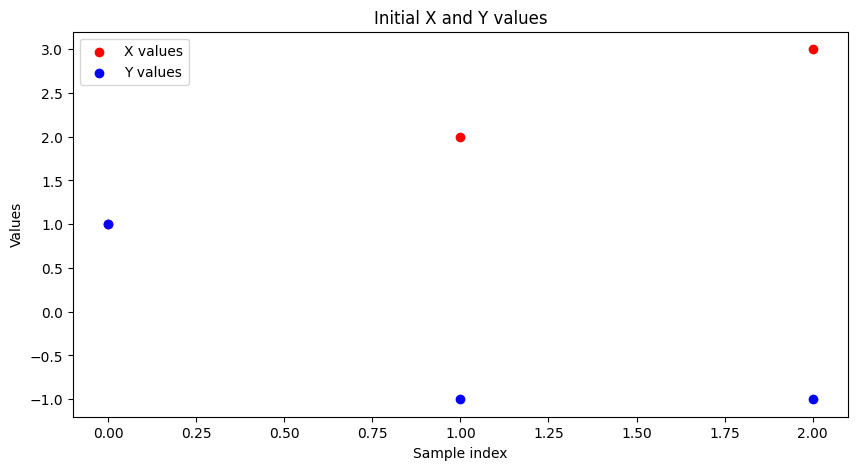

Predicted output for input [1.0, 1.0] is: 0.9999824909911558
Predicted output for input [2.0, 3.0] is: -0.9999951003633172
Predicted output for input [3.0, 3.0] is: -0.999997410306858


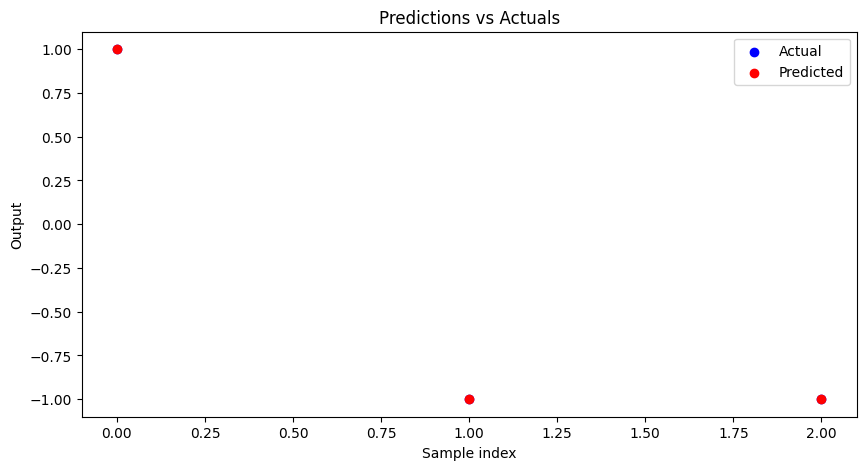

In [8]:

X = [
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 3.0],
]
Y = [
    [1.0],
    [-1.0],
    [-1.0]
]
# Create the MLP
layers = (c_int64 * 2)(2, 1)
mlp_instance = create_mlp(layers, 2)
# Conversion de X et Y en un format utilisable par ctypes
flat_X, flat_Y = convert_to_ctypes(X, Y)
convert_to_ctypes(X,Y)
train(mlp_instance, flat_X, len(X), len(X[0]), flat_Y, 1, 0.1, 1000000, True)
flat_X, flat_Y = convert_to_ctypes(X, Y)
plot_initial_values(X,Y)
plot_predictions_vs_actuals(X,Y,mlp_instance,True)
destroy_mlp(mlp_instance)

# XOR Test case

Predicted output for input [0.0, 0.0] is: -0.12173335573479833
Predicted output for input [0.0, 1.0] is: 0.1174447872729815
Predicted output for input [1.0, 0.0] is: -0.09142554218664779
Predicted output for input [1.0, 1.0] is: 0.09994349758651024


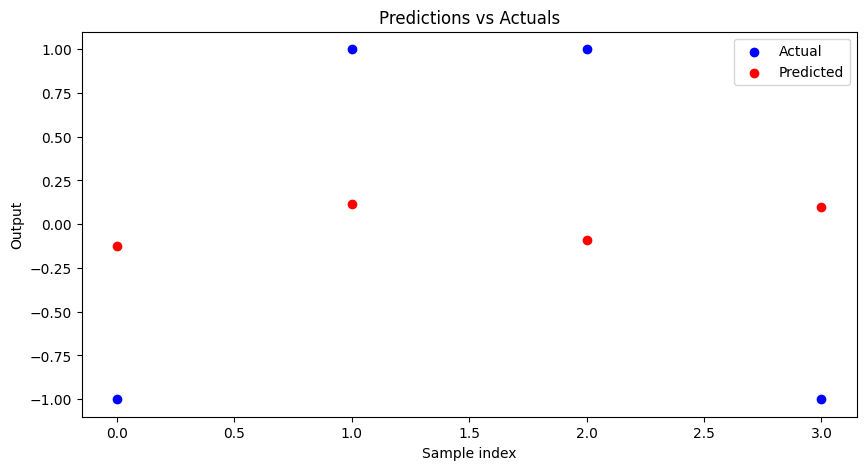

In [9]:
X = [
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
]

Y = [
    [-1.0],
    [1.0],
    [1.0],
    [-1.0]
]
layers = (c_int64 * 3)(2,2,1)
mlp_instance = create_mlp(layers, 3)
# Conversion de X et Y en un format utilisable par ctypes
flat_X, flat_Y = convert_to_ctypes(X, Y)
convert_to_ctypes(X,Y)
train(mlp_instance, flat_X, len(X), len(X[0]), flat_Y, 1, 0.01, 10000000, True)
#plot_initial_values(X,Y)
plot_predictions_vs_actuals(X,Y,mlp_instance,True)
destroy_mlp(mlp_instance)

# Simple Regression Test Cases

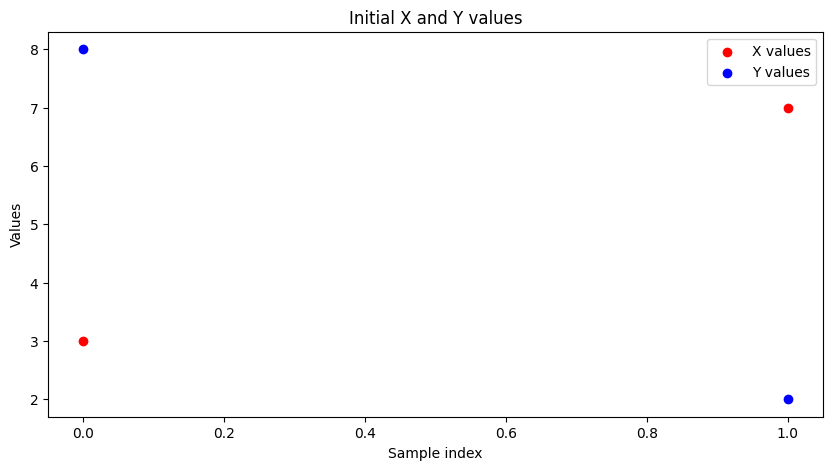

Predicted output for input [3.0] is: 7.999999999999833
Predicted output for input [7.0] is: 2.0000000000000995


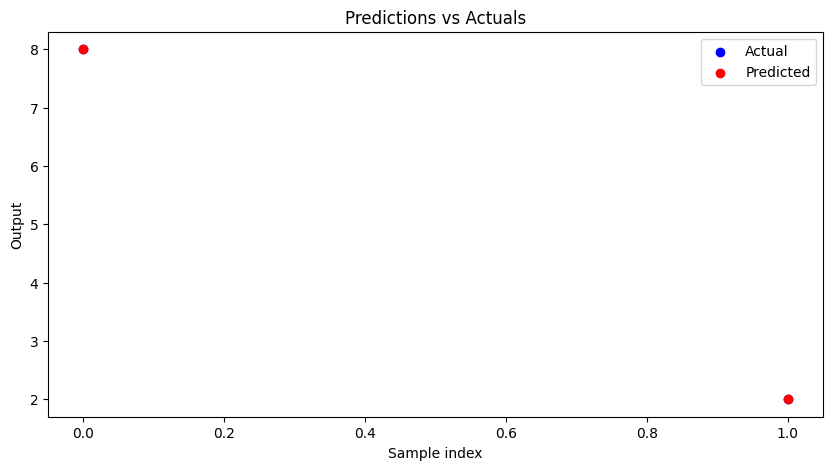

In [10]:
X = [
    [3.0],
    [7.0],
]

Y = [
    [8.0],
    [2.0],
]

# Create an MLP with a hidden layer
layers = (c_int64 * 3)(1, 3, 1)
mlp_instance = create_mlp(layers, 3)

flat_X, flat_Y = convert_to_ctypes(X, Y)
convert_to_ctypes(X,Y)
train(mlp_instance, flat_X, len(X), len(X[0]), flat_Y, 1, 0.1, 1000000, False)
plot_initial_values(X,Y)
plot_predictions_vs_actuals(X,Y,mlp_instance,False)
destroy_mlp(mlp_instance)

#  Non Linear regression test case 

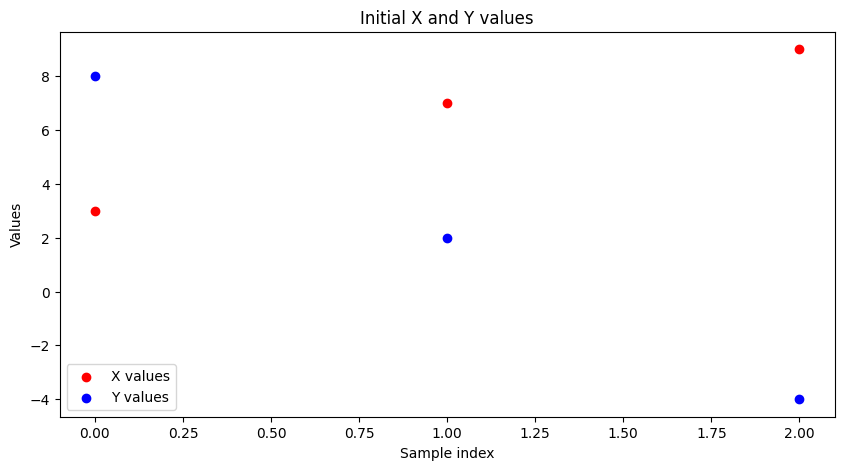

Predicted output for input [3.0] is: 8.000000000003135
Predicted output for input [7.0] is: 1.999999999987045
Predicted output for input [9.0] is: -3.9999999999923386


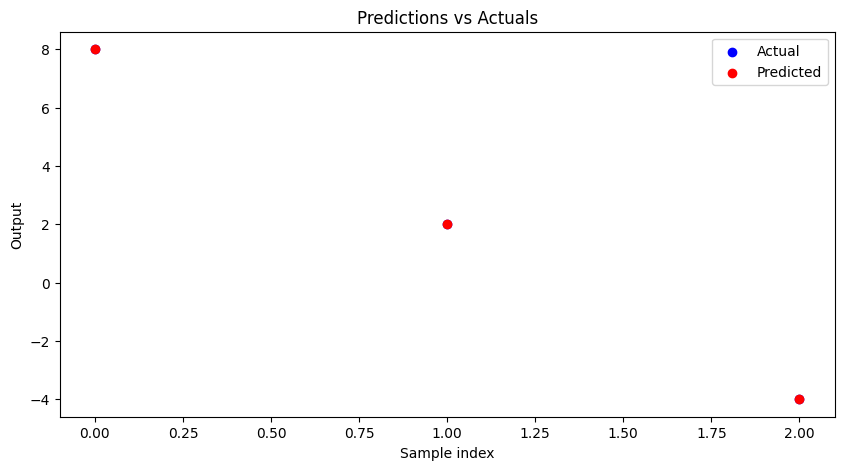

In [24]:
X = [
    [3.0],
    [7.0],
    [9.0],
]

Y = [
    [8.0],
    [2.0],
    [-4.0],
]
layers = (c_int64 * 3)(1, 3, 1)
mlp_instance = create_mlp(layers, 3)

flat_X, flat_Y = convert_to_ctypes(X, Y)
convert_to_ctypes(X,Y)
train(mlp_instance, flat_X, len(X), len(X[0]), flat_Y, 1, 0.1, 1000000, False)
plot_initial_values(X,Y)
plot_predictions_vs_actuals(X,Y,mlp_instance,False)
destroy_mlp(mlp_instance)

